In [10]:
from keras.datasets import reuters
import keras

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data), len(test_data)

(8982, 2246)

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [121]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(128, activation='relu')),
model.add(keras.layers.Dense(46, activation='softmax'))

In [122]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [123]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [124]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
16/16 [==============================] - 1s 42ms/step - loss: 2.2345 - accuracy: 0.5492 - val_loss: 1.3984 - val_accuracy: 0.6960
Epoch 2/4
16/16 [==============================] - 1s 33ms/step - loss: 1.1278 - accuracy: 0.7588 - val_loss: 1.1182 - val_accuracy: 0.7480
Epoch 3/4
16/16 [==============================] - 1s 31ms/step - loss: 0.7868 - accuracy: 0.8324 - val_loss: 0.9836 - val_accuracy: 0.7800
Epoch 4/4
16/16 [==============================] - 1s 32ms/step - loss: 0.5816 - accuracy: 0.8770 - val_loss: 0.9294 - val_accuracy: 0.8110


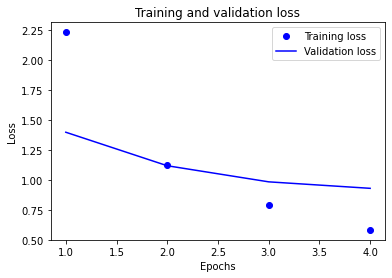

In [125]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

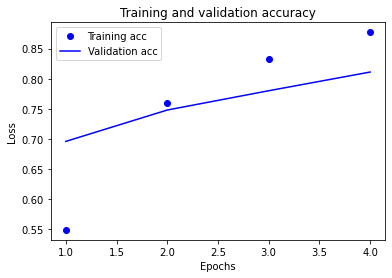

In [126]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [127]:
model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9912 - accuracy: 0.7823


[0.9911871552467346, 0.7822796106338501]

In [128]:
prediction = model.predict(x_test)

In [129]:
prediction[0].shape

(46,)